In [1]:
import mogptk
import numpy as np

#############################################################################################
noise = 0.3
#First, a simple example for 3 sine curves.
X_list = []
#We construct a new set of observations, noting that observations must be sorted according to X axis.
#We generate 100 random values from the interval [0,4) 3 times and store them in a list.
#Each element of the list is a sorted array of 100 values.
for new_observation in range(3):
    X_list.append(np.sort(np.random.uniform(0, 4, 100)))

#Now we generate our observations, based on the previously randomly chosen X values.
#Each element of y_list corresponds to one element of X_list (e.g: X_list[0] are the 
#X values of y_list[0]).
y_list = []
#Sine(6X) + Noise
y_list.append(np.sin(6*X_list[0]) + np.random.standard_t(3, X_list[0].shape)*noise)
#Sine(6X+2) + Noise
y_list.append(np.sin(6*X_list[1] + 2) + np.random.standard_t(3, X_list[1].shape)*noise)
#Sine(6X+2) - Sine(4X) + Noise
y_list.append(np.sin(6*X_list[2] + 2) - np.sin(4*X_list[2]) + np.random.standard_t(3, X_list[2].shape)*noise)
#############################################################################################

#############################################################################################
#We define the model, stating the number of components Q.
model = mogptk.model(3)
#############################################################################################

#############################################################################################
#The model needs a specific format, so we transform our observations
#to comply with it. More information about this specific format in
# 'Add training data to the model' section of model.py .
#X, y = model.transform_lists_into_multioutput_format(X_list, y_list)
model.add_training_data(X_list,y_list)
#############################################################################################

#############################################################################################
#We must first build the model with the current training data. When we do this, the
#model's parameters are chosen at random.
parameters = {'components': 3, }
model.build_model('CONV', 'full', parameters=parameters)
print(model.read_trainables())
#############################################################################################

channels  [0 1 2]
elements per channel  [100 100 100]
input dimensions  1
output dimensions  3
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


{'GPR/kern/kernels/0/channel_variance': array([[0., 0., 0.]]), 'GPR/kern/kernels/0/component_variance': array([0.28732682]), 'GPR/kern/kernels/0/constant': array([0.34993722, 0.15316227, 0.72049045]), 'GPR/kern/kernels/1/channel_variance': array([[0., 0., 0.]]), 'GPR/kern/kernels/1/component_variance': array([0.99149536]), 'GPR/kern/kernels/1/constant': array([0.66697891, 0.56170215, 0.04944026]), 'GPR/kern/kernels/2/channel_variance': array([[0., 0., 0.]]), 'GPR/kern/kernels/2/component_variance': array([0.62747144]), 'GPR/kern/kernels/2/constant': array([0.3996118 , 0.31589195, 0.87478543]), 'GPR/likelihood/variance': array(1.)}


In [2]:
#############################################################################################
#We fit the model, for a max of 50 iterations, using the default optimizer L-BFGS-B.
model.optimize(iterations = 2000, display=True)
#model.optimize_with_adam(iterations=2000, learning_rate = 0.001)
#############################################################################################

Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 330.041598
  Number of iterations: 77
  Number of functions evaluations: 101


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 330.041598
  Number of iterations: 77
  Number of functions evaluations: 101


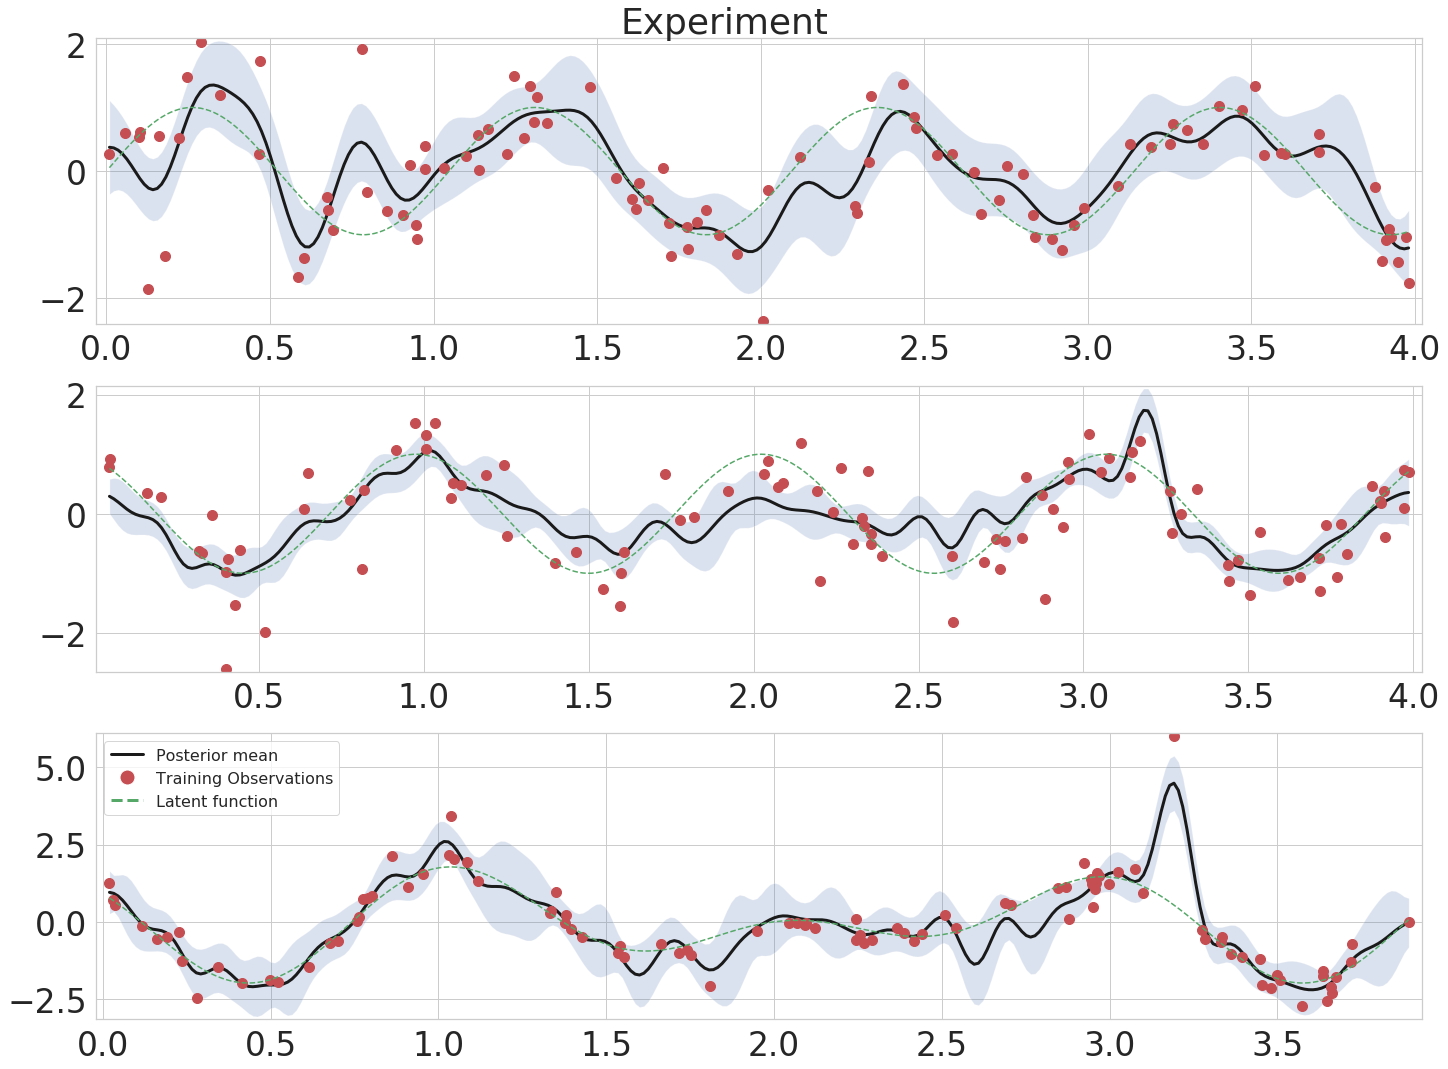

In [3]:
#############################################################################################
#We can automatically generate a prediction interval.
#First argument is the point resolution (number of points).
#The second argument is a list containing the desired channels to predict upon.
X_pred = model.predict_interval(300, [0,1,2])
#############################################################################################

#############################################################################################
#We perform the prediction.
Y_pred, STD_pred = model.predict(X_pred)
#############################################################################################

#############################################################################################
#Since we know the functions that we're trying to approximate (without noise)...
def latent1(x):
    return np.sin(6*x)

def latent2(x):
    return np.sin(6*x + 2)

def latent3(x):
    return np.sin(6*x + 2) - np.sin(4*x)
#...we can declare a set of latent functions in the model. The first argument is the set of 
#functions, and the second argument contains the corresponding channels. This is entirely optional,
#and it is not used to perform anything in the model, it's only for plotting purposes.
model.define_latent_functions([latent1, latent2, latent3], [0,1,2])
#############################################################################################

#############################################################################################
#We can save plots for our prediction.
model.make_plots("conv_example.png")
#############################################################################################